In [1]:
# Imports
from clases.red_rddas_model import RedRddasModel
from clases.experiment_model import ExperimentModel

import ray
import time
import pandas as pd
import numpy as np
import pickle  # library to serialization object

from itertools import product  # generate combinations of numbers

# Ray Configurations
# ray.shutdown()
# runtime_env = {"working_dir": "/home/reynaldo/Documents/RESEARCH/SynEstRDDA", "pip": ["requests", "pendulum==2.1.2"]}
# ray.init(address='ray://172.17.163.253:10001', runtime_env=runtime_env, log_to_driver=False)
# ray.init(address='ray://172.17.163.244:10001', runtime_env=runtime_env , log_to_driver=False, num_cpus=12)
# ray.init(log_to_driver=False, num_cpus=12)

In [2]:
# Parameters
n_rdds = 3
n_of_variables_rdda = 2
n_of_signals_rdda = 2
n_exit_variables = 2
n_clauses_function = 2
type_network = "ALEATORY"

# Generate the RDDA
o_rdda = RedRddasModel(number_of_rddas=n_rdds,number_of_variables_rdda=n_of_variables_rdda,number_of_signals_rdda=n_of_signals_rdda,number_exit_variables=n_exit_variables,number_clauses_function=n_clauses_function)

# Show the RDDA
o_rdda.show_description()

# Generate the RDDs
o_rdda.generate_rddas(type_network=type_network)

# Show the list of RDDs
o_rdda.show_rdds()

# Find the attractors by RDD
o_rdda = RedRddasModel.find_attractors_rddas(o_rdda)

# Show the attractors of the RDDs by Signal
o_rdda.show_attractors()

# Calculation the Attractor Pairs
o_rdda = RedRddasModel.calculation_compatible_pairs(o_rdda)

# Show the list of attractor pairs
o_rdda.show_attractor_pairs()

# Assembly the attractor fields
l_partial_paths = o_rdda.assembly_attractor_fields_pruning(o_rdda)

# Show the list of attractor fields
o_rdda.show_attractor_fields_detail()

NETWORK RDDA DESCRIPTION
Number of RDDs : 3
Number of variables by RDD : 2
Number of coupling signals by RDD : 2
Maximum number of exit variables by signal : 3
Maximum number of clauses by function : 3
List of RDDs of the RDDA
RDDA DESCRIPTION
Name of RDDA : 1
List of intern variables : 
[1, 2]
List of coupling signals : 
---------------
Network Input : 1
Network Output : 2
Variables : [3, 4]
Name Variable : 7
Coupling Function :  3 ∨ 4 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
---------------
Network Input : 1
Network Output : 3
Variables : [5, 6]
Name Variable : 8
Coupling Function :  5 ∨ 6 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
Description of Variables
V: 1 CNF :[[2, 8]]
V: 2 CNF :[[2]]
RDDA DESCRIPTION
Name of RDDA : 2
List of intern variables : 
[3, 4]
List of coupling signals : 
---------------
Network Input : 2
Network Output : 1
Variables : [1, 2]
Name Variable : 9
Coupling Function :  1 ∨ 2 
Truth Table: {'11

In [3]:
# # Lucas Code
# # Tree pruning in the Assembly of attractor fields
# # imports
# import matplotlib.pyplot as plt
# import networkx as nx
# import pydot
# from networkx.drawing.nx_pydot import graphviz_layout
# import numpy as np
#
# # Create Dictionary
# d_pairs = {}
# v_key = 1
# for v_pair in o_rdda.list_attractors_pairs:
#     d_pairs[v_key] = v_pair
#     v_key = v_key + 1
#
# # Show the dictionary and the
# for v_key, v_value in d_pairs.items():
#     print(v_key, ":", v_value)
#
# # List all the partial paths in the assembly attractor fields method
# l_path_edge = []
# for l_path in l_partial_paths:
#     for path in l_path:
#         l_path_edge.append(path)
#
# # fill the edges
# l_edges_dict = []
# v_edge_ = np.array([np.apply_along_axis(lambda args : [complex(*args)], 1, item) for item in [np.array(value)[-2:] for value in l_path_edge]]).reshape(len(l_path_edge),2)
# v_indexes_ = np.array([value[0]+1j*value[1] for value in d_pairs.values()])
# l_edges_dict = np.asarray([np.asarray([np.where(v_indexes_ == v_edge_item) for v_edge_item in v_edge_[:,j]],dtype=object).reshape(v_edge_[:,0].size) for j in range(2)]).T.tolist()
# l_edges_dict

In [4]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Create Dictionary
d_pairs = {}
v_key = 1
for v_pair in o_rdda.list_attractors_pairs:
    d_pairs[v_key] = v_pair
    v_key = v_key + 1

# Show the dictionary and the
for v_key, v_value in d_pairs.items():
    print(v_key, ":", v_value)

# List all the partial paths in the assembly attractor fields method
l_path_edge = []
for l_path in l_partial_paths:
    for path in l_path:
        # print(path)
        # select the final edges
        l_path_edge.append(path[-2:])
        # print(path[-2:])

# fill the edges with dict
l_edges_dict = []
for v_edge in l_path_edge:
    v_edge_dict = []
    for key, value in d_pairs.items():
        if value == v_edge[0]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[0])
            # print(key)
    for key, value in d_pairs.items():
        if value == v_edge[1]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[1])
            # print(key)
    l_edges_dict.append(v_edge_dict)
print(l_edges_dict)

1 : [0, 8]
2 : [0, 11]
3 : [0, 14]
4 : [0, 17]
5 : [1, 8]
6 : [1, 11]
7 : [1, 14]
8 : [1, 17]
9 : [2, 8]
10 : [2, 11]
11 : [2, 14]
12 : [2, 17]
13 : [3, 8]
14 : [3, 11]
15 : [3, 14]
16 : [3, 17]
17 : [4, 9]
18 : [4, 10]
19 : [4, 12]
20 : [4, 13]
21 : [4, 15]
22 : [4, 16]
23 : [4, 18]
24 : [4, 19]
25 : [5, 9]
26 : [5, 10]
27 : [5, 12]
28 : [5, 13]
29 : [5, 15]
30 : [5, 16]
31 : [5, 18]
32 : [5, 19]
33 : [6, 9]
34 : [6, 10]
35 : [6, 12]
36 : [6, 13]
37 : [6, 15]
38 : [6, 16]
39 : [6, 18]
40 : [6, 19]
41 : [7, 9]
42 : [7, 10]
43 : [7, 12]
44 : [7, 13]
45 : [7, 15]
46 : [7, 16]
47 : [7, 18]
48 : [7, 19]
49 : [0, 20]
50 : [1, 20]
51 : [2, 21]
52 : [2, 22]
53 : [2, 23]
54 : [3, 21]
55 : [3, 22]
56 : [3, 23]
57 : [4, 20]
58 : [5, 20]
59 : [6, 21]
60 : [6, 22]
61 : [6, 23]
62 : [7, 21]
63 : [7, 22]
64 : [7, 23]
65 : [8, 0]
66 : [8, 4]
67 : [9, 0]
68 : [9, 4]
69 : [10, 0]
70 : [10, 4]
71 : [11, 0]
72 : [11, 4]
73 : [12, 0]
74 : [12, 4]
75 : [13, 0]
76 : [13, 4]
77 : [14, 1]
78 : [14, 2]
79 : [1

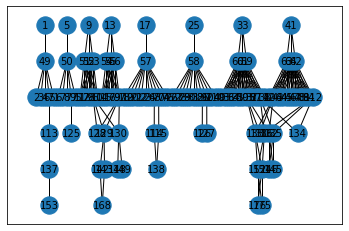

<Figure size 180000x90000 with 0 Axes>

In [5]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Generate the graph with the paths
T = nx.Graph()
# T.add_nodes_from(d_pairs.keys())
T.add_edges_from(l_edges_dict)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(600,300), dpi=300)
plt.show()

# Generate full tree for enumerate method

In [17]:
# select all the pairs from the groups
# List all the partial paths in the assembly attractor fields method

l_aux = []
v_begin = 1
for element in o_rdda.list_signal_pairs:
    l_aux.append(list(range(v_begin ,len(element)+1)))
    print(list(range(v_begin,len(element))))
    v_begin = v_begin + len(element)

# # Generate the edges
# l_path_edge = []
# for field in product(*o_rdda.list_signal_pairs):
#     print(field)
#     l_path_edge.append(field[-2:])
# print(l_path_edge)


# # fill the edges with dict
# l_edges_dict = []
# for v_edge in l_path_edge:
#     v_edge_dict = []
#     for key, value in d_pairs.items():
#         if value == v_edge[0]:
#             v_edge_dict.append(key)
#             # print(value)
#             # print(v_edge[0])
#             # print(key)
#     for key, value in d_pairs.items():
#         if value == v_edge[1]:
#             v_edge_dict.append(key)
#             # print(value)
#             # print(v_edge[1])
#             # print(key)
#     l_edges_dict.append(v_edge_dict)
# print(l_edges_dict)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
[]
[]
[]
[]
[]


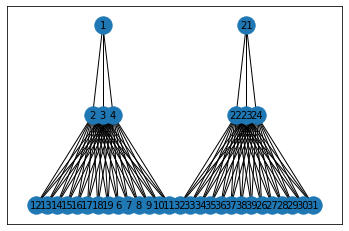

<Figure size 180000x90000 with 0 Axes>

In [7]:
# Generate the graph with the paths
T = nx.Graph()
# T = nx.generators.balanced_tree(2, 5)
# T.add_nodes_from(d_pairs.keys())
# T.add_edges_from(l_edges_dict)

L1 = [1]
L2 = [x for x in range(2,5)]
L3 = [x for x in range(6,20)]

L4 = [21]
L5 = [x for x in range(22,25)]
L6 = [x for x in range(26,30)]

T.add_node(1)
T.add_nodes_from(L1)
T.add_nodes_from(L2)
T.add_nodes_from(L3)
for i in range(2,5):
    T.add_edge(1,i)
    for j in range (6,20):
        T.add_edge(i,j)

T.add_node(21)
T.add_nodes_from(L4)
T.add_nodes_from(L5)
T.add_nodes_from(L6)
for i in range(22,25):
    T.add_edge(21,i)
    for j in range (26,40):
        T.add_edge(i,j)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(600,300), dpi=300)
plt.show()